# Diabetes Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

**Source:** [Kaggle](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

## Preparations
Installing required modules and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pytest
import re

In [2]:
diabetes_data = pd.read_csv("../../data/diabetes.csv")

## Data Inspection
Data inspection involves systematically examining datasets to identify any inconsistencies, patterns, or anomalies that may affect the quality and reliability of the data.

In [3]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.shape

(768, 9)

In [7]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Cleaning
Data cleaning is the process of correcting or removing inaccuracies, inconsistencies, and errors from datasets to ensure that the data is accurate, complete, and ready for analysis.

In [10]:
previous_rows = len(diabetes_data)
diabetes_data = diabetes_data.drop_duplicates()
print(f"Dropped {previous_rows - len(diabetes_data)} rows")

Dropped 0 rows


## Data Analysis


First, I will look at the relationship between age and diabetes.

<Axes: xlabel='Age', ylabel='Outcome'>

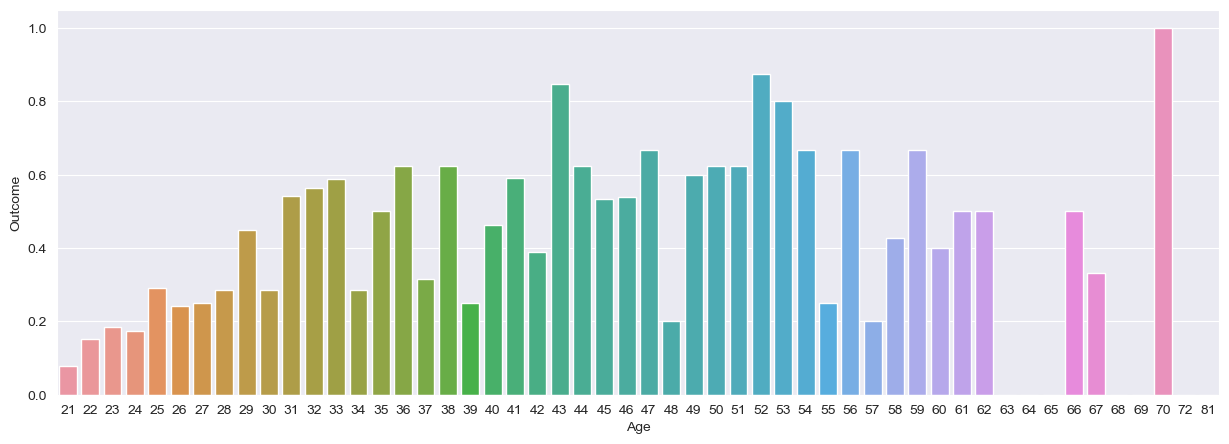

In [11]:
plt.figure(figsize=(15, 5))
sns.barplot(diabetes_data, y=diabetes_data.Outcome, x=diabetes_data.Age, errorbar=None)

In [12]:
ages = diabetes_data.groupby("Age").size()
ages

Age
21    63
22    72
23    38
24    46
25    48
26    33
27    32
28    35
29    29
30    21
31    24
32    16
33    17
34    14
35    10
36    16
37    19
38    16
39    12
40    13
41    22
42    18
43    13
44     8
45    15
46    13
47     6
48     5
49     5
50     8
51     8
52     8
53     5
54     6
55     4
56     3
57     5
58     7
59     3
60     5
61     2
62     4
63     4
64     1
65     3
66     4
67     3
68     1
69     2
70     1
72     1
81     1
dtype: int64

In [13]:
ages.sum()

768

In [14]:
diabetes_free_ages: list = [63, 64, 65, 68, 69, 72, 81]

In [15]:
ages.loc[diabetes_free_ages]

Age
63    4
64    1
65    3
68    1
69    2
72    1
81    1
dtype: int64

In [16]:
diabetes_data[diabetes_data.Age.isin(diabetes_free_ages)].sort_values("Age")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
263,3,142,80,15,0,32.4,0.200,63,0
361,5,158,70,0,0,29.8,0.207,63,0
479,4,132,86,31,0,28.0,0.419,63,0
763,10,101,76,48,180,32.9,0.171,63,0
509,8,120,78,0,0,25.0,0.409,64,0
148,5,147,78,0,0,33.7,0.218,65,0
294,0,161,50,0,0,21.9,0.254,65,0
362,5,103,108,37,0,39.2,0.305,65,0
674,8,91,82,0,0,35.6,0.587,68,0
123,5,132,80,0,0,26.8,0.186,69,0


In [17]:
diabetes_data[diabetes_data.Age.isin([70])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
666,4,145,82,18,0,32.5,0.235,70,1


<Axes: xlabel='Age', ylabel='Outcome'>

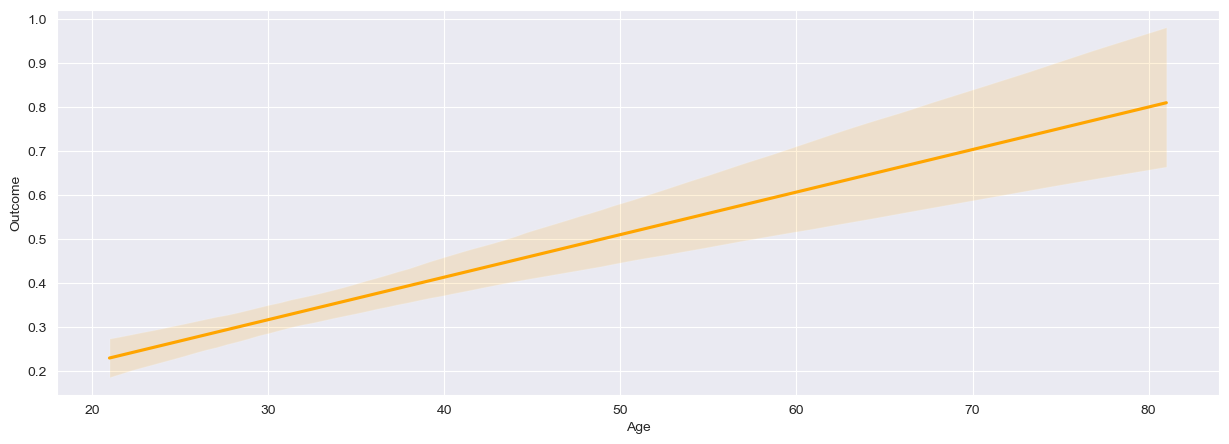

In [18]:
plt.figure(figsize=(15, 5))
sns.regplot(diabetes_data, y=diabetes_data.Outcome, x=diabetes_data.Age, color="orange", scatter=False)

As we can see, there is a DiabetesPedigreeFunction, so probably the diabetes risk will increase with it. But we cannot be sure, so let's check it.

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

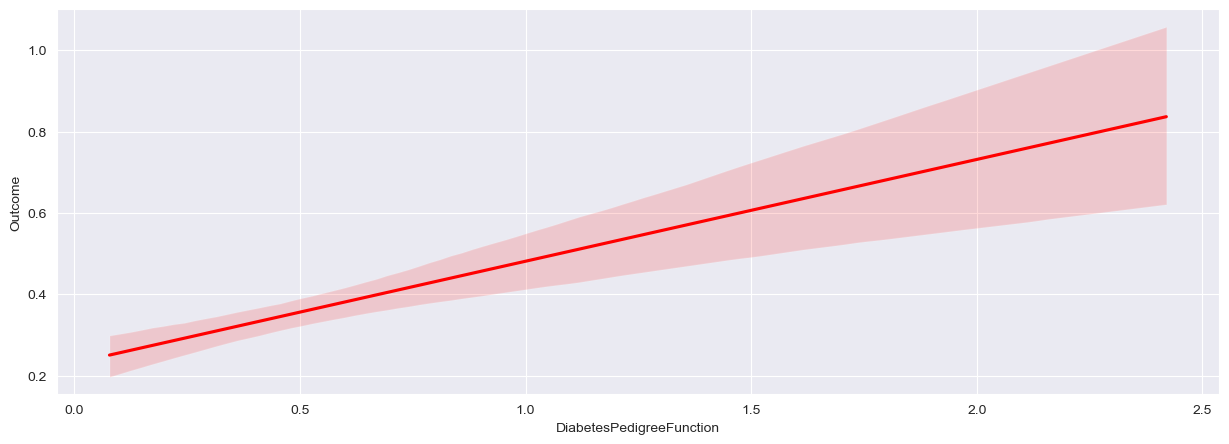

In [19]:
plt.figure(figsize=(15, 5))
sns.regplot(diabetes_data, y=diabetes_data.Outcome, x=diabetes_data.DiabetesPedigreeFunction, color="red", scatter=False)

Is there a relationship between the BMI and diabetes?

<Axes: xlabel='BMI', ylabel='Outcome'>

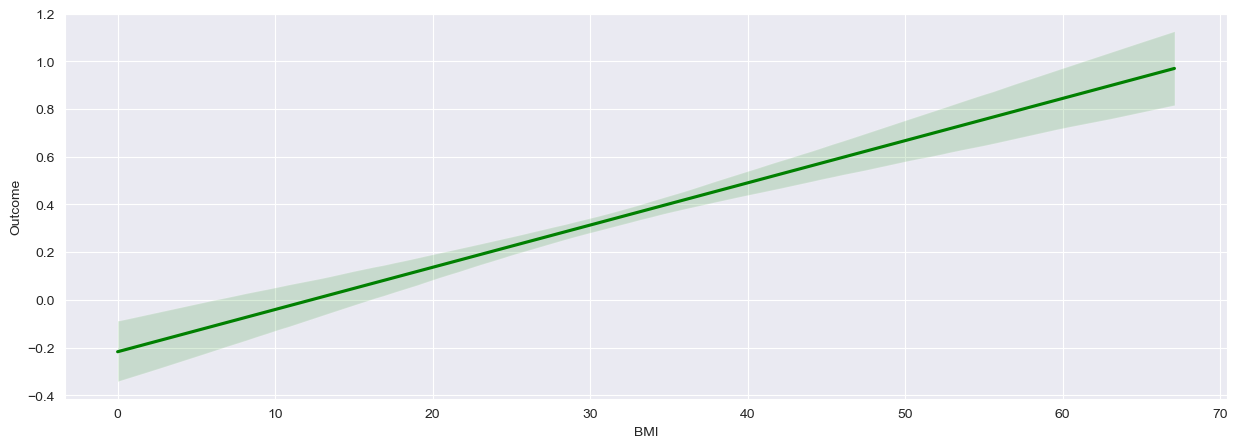

In [20]:
plt.figure(figsize=(15, 5))
sns.regplot(diabetes_data, y=diabetes_data.Outcome, x=diabetes_data.BMI, color="green", scatter=False)

<Axes: xlabel='BMI', ylabel='Age'>

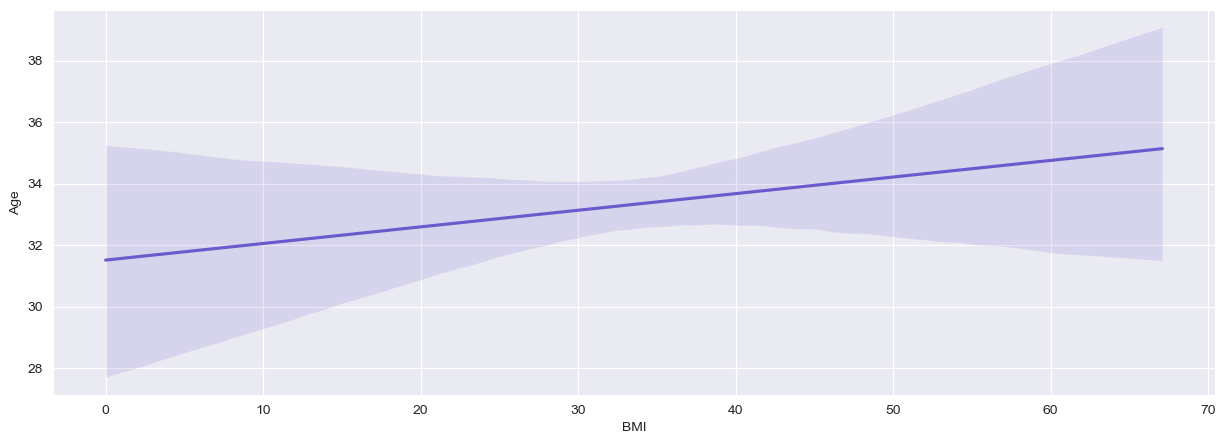

In [21]:
plt.figure(figsize=(15, 5))
sns.regplot(diabetes_data, y=diabetes_data.Age, x=diabetes_data.BMI, color="slateblue", scatter=False)

<Axes: xlabel='BMI', ylabel='Age'>

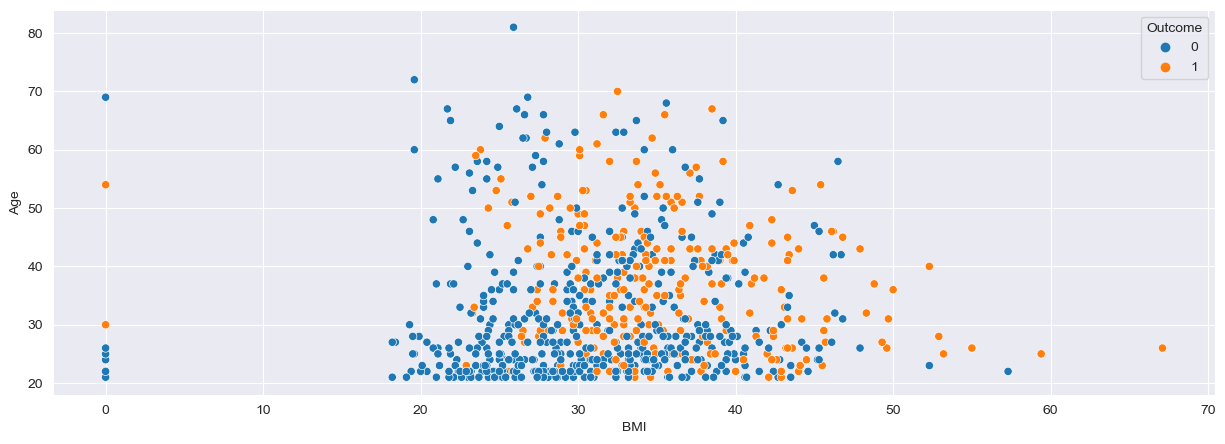

In [22]:
plt.figure(figsize=(15, 5))
sns.scatterplot(diabetes_data, x=diabetes_data.BMI, y=diabetes_data.Age, hue=diabetes_data.Outcome)

Does insulin have anything to do with diabetes?

In [23]:
bins = np.arange(0, diabetes_data.Insulin.max() + 50, 50)

In [24]:
diabetes_data['Insulin_binned'] = pd.cut(diabetes_data.Insulin, bins, include_lowest=True, right=False)

In [25]:
def format_bin(bin):
    lower = int(bin.left)
    upper = int(bin.right)
    return f"{lower}-{upper}"

diabetes_data['Insulin_binned'] = diabetes_data['Insulin_binned'].apply(format_bin)

C:\Users\Leo\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


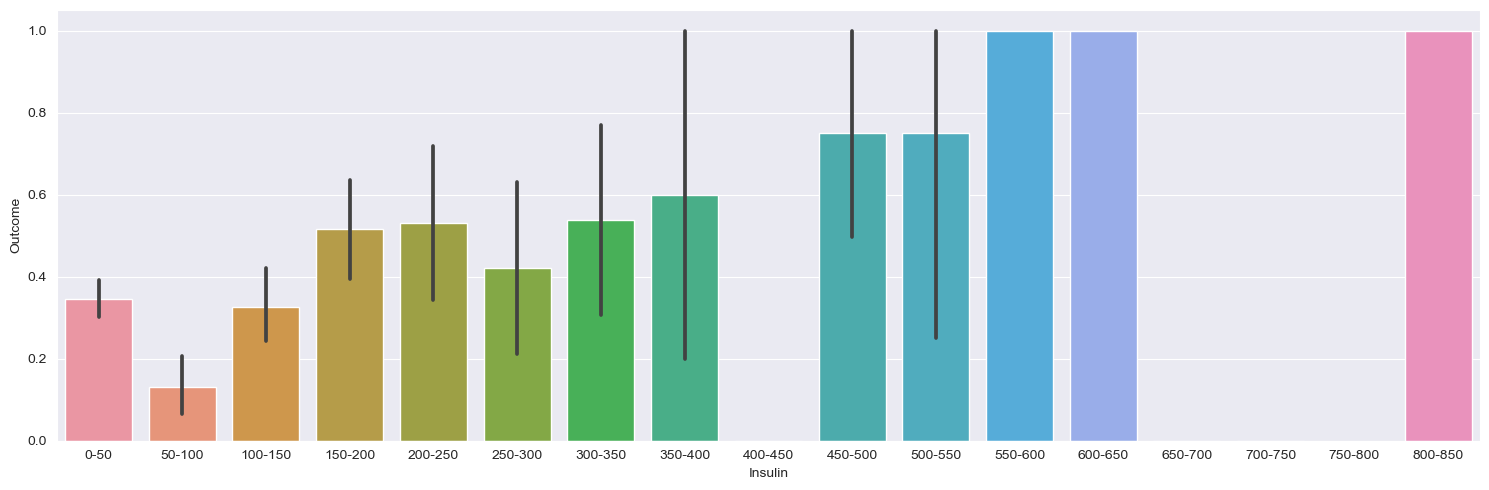

In [26]:
plt.figure(figsize=(15, 5))

sns.barplot(data=diabetes_data, x='Insulin_binned', y=diabetes_data.Outcome)

plt.xlabel("Insulin")

plt.tight_layout()
plt.show()

In [27]:
mask = (
    (diabetes_data.Insulin.isin([i for i in range(400, 451)])) |
    (diabetes_data.Insulin.isin([i for i in range(650, 801)]))
)

diabetes_data[mask]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_binned
228,4,197,70,39,744,36.7,2.329,31,0,700-750
247,0,165,90,33,680,52.3,0.427,23,0,650-700
248,9,124,70,33,402,35.4,0.282,34,0,400-450
392,1,131,64,14,415,23.7,0.389,21,0,400-450
645,2,157,74,35,440,39.4,0.134,30,0,400-450


C:\Users\Leo\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


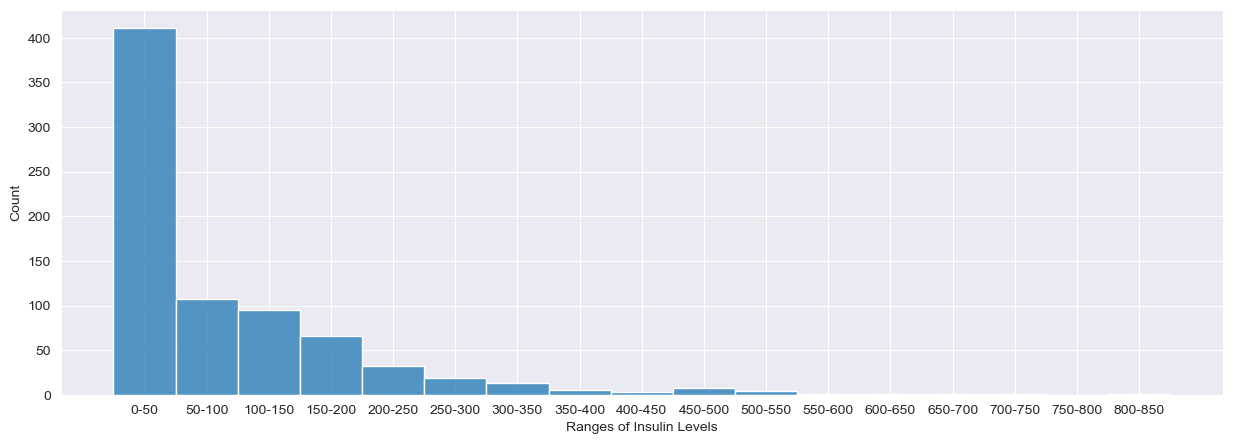

In [28]:
plt.figure(figsize=(15, 5))

sns.histplot(data=diabetes_data, x=diabetes_data.Insulin_binned)

plt.xlabel("Ranges of Insulin Levels")

plt.show()

What about a relation between the skin thickness and diabetes?

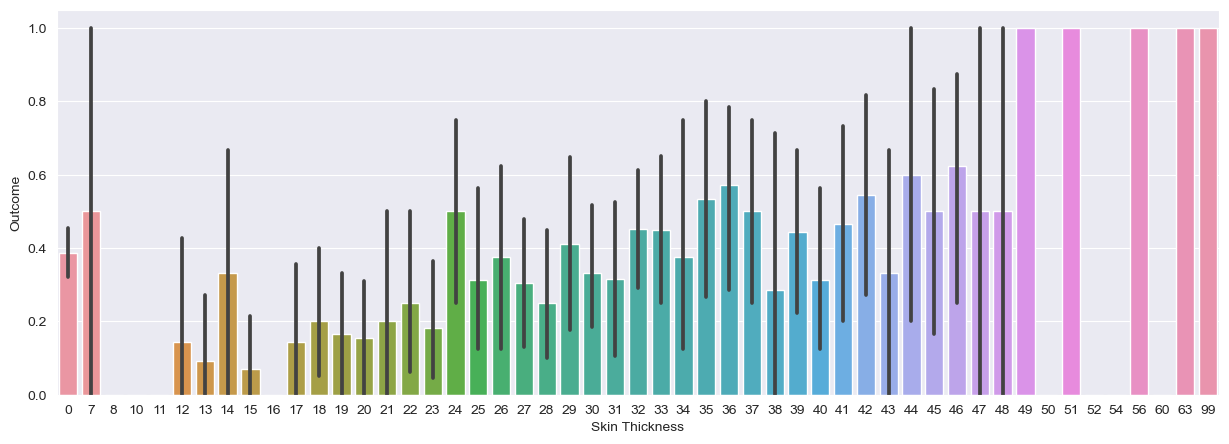

In [29]:
plt.figure(figsize=(15, 5))

sns.barplot(data=diabetes_data, x=diabetes_data.SkinThickness, y=diabetes_data.Outcome)

plt.xlabel("Skin Thickness")

plt.show()

In [30]:
# Checking if the values without std are unique

diabetes_data[diabetes_data.SkinThickness > 49]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_binned
57,0,100,88,60,110,46.8,0.962,31,0,100-150
86,13,106,72,54,0,36.6,0.178,45,0,0-50
99,1,122,90,51,220,49.7,0.325,31,1,200-250
120,0,162,76,56,100,53.2,0.759,25,1,100-150
150,1,136,74,50,204,37.4,0.399,24,0,200-250
211,0,147,85,54,0,42.8,0.375,24,0,0-50
273,1,71,78,50,45,33.2,0.422,21,0,0-50
275,2,100,70,52,57,40.5,0.677,25,0,50-100
445,0,180,78,63,14,59.4,2.420,25,1,0-50
532,1,86,66,52,65,41.3,0.917,29,0,50-100


In [31]:
# Skin Thickness > 0
# 768
diabetes_data.SkinThickness[diabetes_data.SkinThickness > 0].count()

541

In [32]:
diabetes_data.SkinThickness[diabetes_data.SkinThickness].mean()

24.135416666666668

In [33]:
# Skin Thickness > 0 and has diabetes

diabetes_data.SkinThickness[(diabetes_data.SkinThickness > 0) & (diabetes_data.Outcome == True)].count()

180

In [34]:
# Skin Thickness > mean and has diabetes

diabetes_data.SkinThickness[(diabetes_data.SkinThickness > diabetes_data.SkinThickness.mean()) & (diabetes_data.Outcome == True)].count()

163

In [35]:
# Skin Thickness > 0 and has not diabetes

diabetes_data.SkinThickness[(diabetes_data.SkinThickness > 0) & (diabetes_data.Outcome == False)].count()

361

In [36]:
# Skin Thickness > mean and has not diabetes

diabetes_data.SkinThickness[(diabetes_data.SkinThickness > diabetes_data.SkinThickness.mean()) & (diabetes_data.Outcome == False)].count()

254

And what about blood pressure?

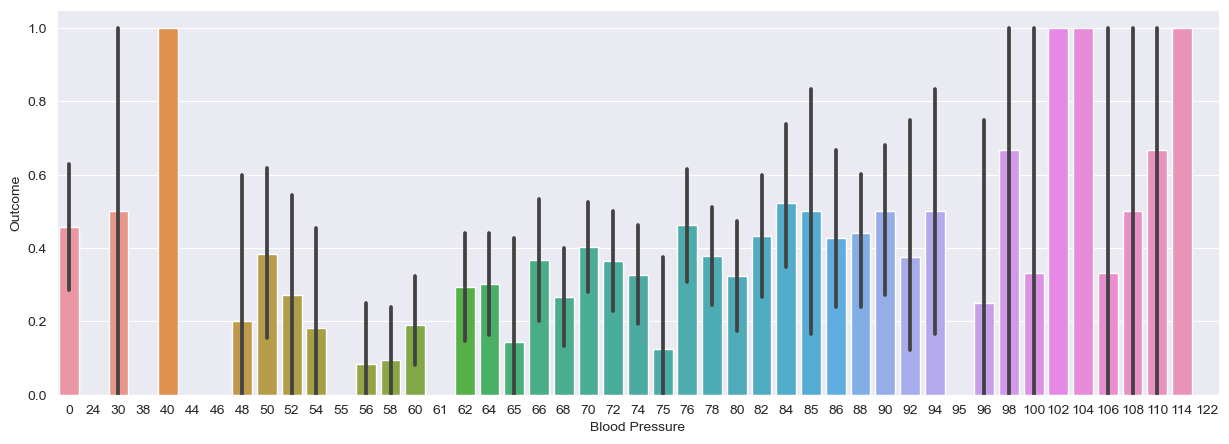

In [37]:
plt.figure(figsize=(15, 5))

sns.barplot(data=diabetes_data, x=diabetes_data.BloodPressure, y=diabetes_data.Outcome)

plt.xlabel("Blood Pressure")

plt.show()

In [38]:
strange_blood_pressures = [24, 38, 40, 44, 46, 55, 61, 95, 102, 104, 113, 122]
strange_blood_pressures_data = diabetes_data[diabetes_data.BloodPressure.isin(strange_blood_pressures)].groupby("BloodPressure").size()
strange_blood_pressures_data

BloodPressure
24     1
38     1
40     1
44     4
46     2
55     2
61     1
95     1
102    1
104    2
122    1
dtype: int64

In [39]:
strange_blood_pressures_data.sum()

17

In [40]:
diabetes_data[diabetes_data.BloodPressure.isin([44, 46, 55, 104])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_binned
80,3,113,44,13,0,22.4,0.140,22,0,0-50
90,1,80,55,0,0,19.1,0.258,21,0,0-50
194,8,85,55,20,0,24.4,0.136,42,0,0-50
207,5,162,104,0,0,37.7,0.151,52,1,0-50
346,1,139,46,19,83,28.7,0.654,22,0,50-100
440,0,189,104,25,0,34.3,0.435,41,1,0-50
575,1,119,44,47,63,35.5,0.280,25,0,50-100
576,6,108,44,20,130,24.0,0.813,35,0,100-150
707,2,127,46,21,335,34.4,0.176,22,0,300-350
741,3,102,44,20,94,30.8,0.400,26,0,50-100


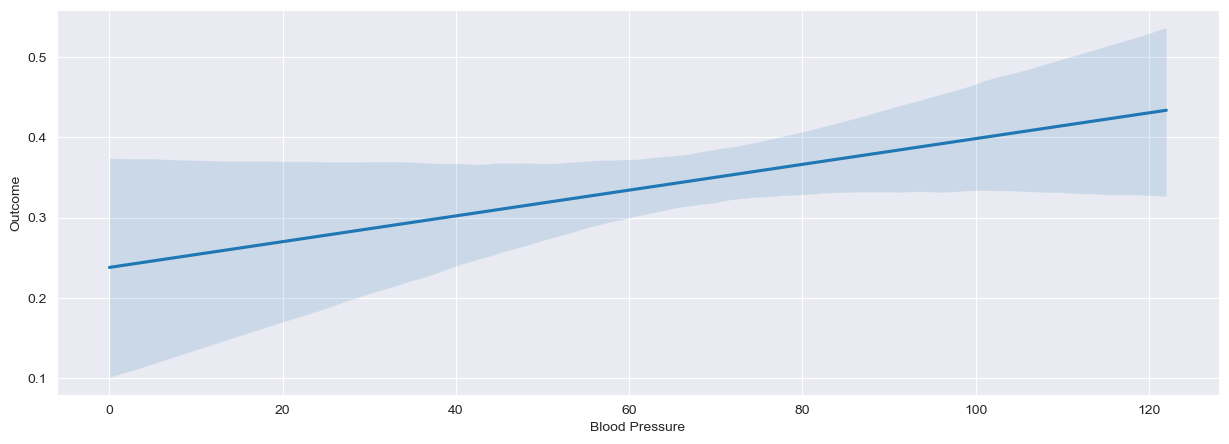

In [41]:
plt.figure(figsize=(15, 5))

sns.regplot(data=diabetes_data, x=diabetes_data.BloodPressure, y=diabetes_data.Outcome, scatter=False)

plt.xlabel("Blood Pressure")

plt.show()

And what does the glucose do?

In [42]:
bins = np.arange(0, diabetes_data.Glucose.max() + 10, 10)
diabetes_data['Glucose_binned'] = pd.cut(diabetes_data.Glucose, bins, include_lowest=True, right=False)
diabetes_data['Glucose_binned'] = diabetes_data['Glucose_binned'].apply(format_bin)

C:\Users\Leo\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


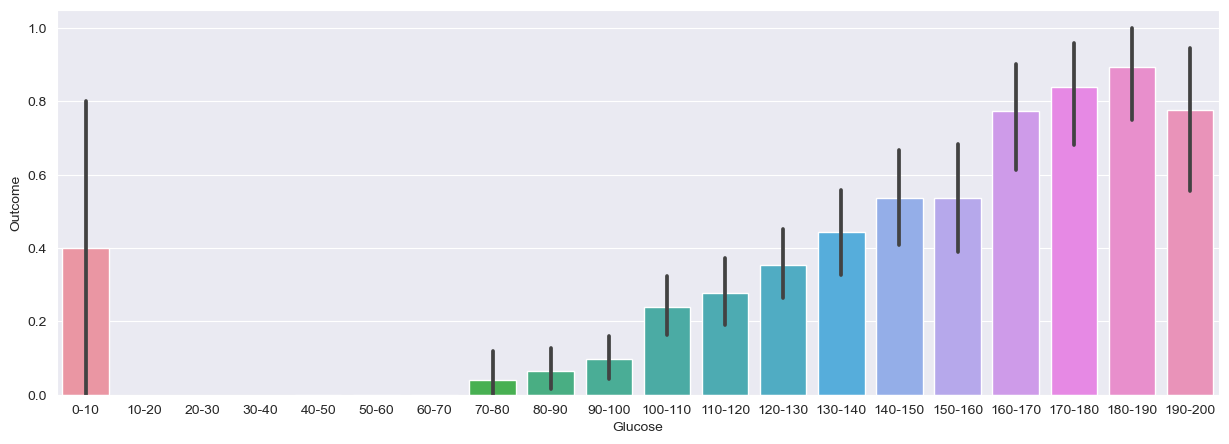

In [43]:
plt.figure(figsize=(15, 5))

sns.barplot(data=diabetes_data, x=diabetes_data["Glucose_binned"], y=diabetes_data.Outcome)

plt.xlabel("Glucose")

plt.show()

In [50]:
diabetes_data[(diabetes_data.Glucose < 71) & (diabetes_data.Glucose > 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_binned,Glucose_binned
62,5,44,62,0,0,25.0,0.587,36,0,0-50,40-50
76,7,62,78,0,0,32.6,0.391,41,0,0-50,60-70
146,9,57,80,37,0,32.8,0.096,41,0,0-50,50-60
352,3,61,82,28,0,34.4,0.243,46,0,0-50,60-70
520,2,68,70,32,66,25.0,0.187,25,0,50-100,60-70
537,0,57,60,0,0,21.7,0.735,67,0,0-50,50-60
596,0,67,76,0,0,45.3,0.194,46,0,0-50,60-70
617,2,68,62,13,15,20.1,0.257,23,0,0-50,60-70
672,10,68,106,23,49,35.5,0.285,47,0,0-50,60-70
680,2,56,56,28,45,24.2,0.332,22,0,0-50,50-60


In [51]:
diabetes_data[(diabetes_data.Glucose < 11)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Insulin_binned,Glucose_binned
75,1,0,48,20,0,24.7,0.140,22,0,0-50,0-10
182,1,0,74,20,23,27.7,0.299,21,0,0-50,0-10
342,1,0,68,35,0,32.0,0.389,22,0,0-50,0-10
349,5,0,80,32,0,41.0,0.346,37,1,0-50,0-10
502,6,0,68,41,0,39.0,0.727,41,1,0-50,0-10


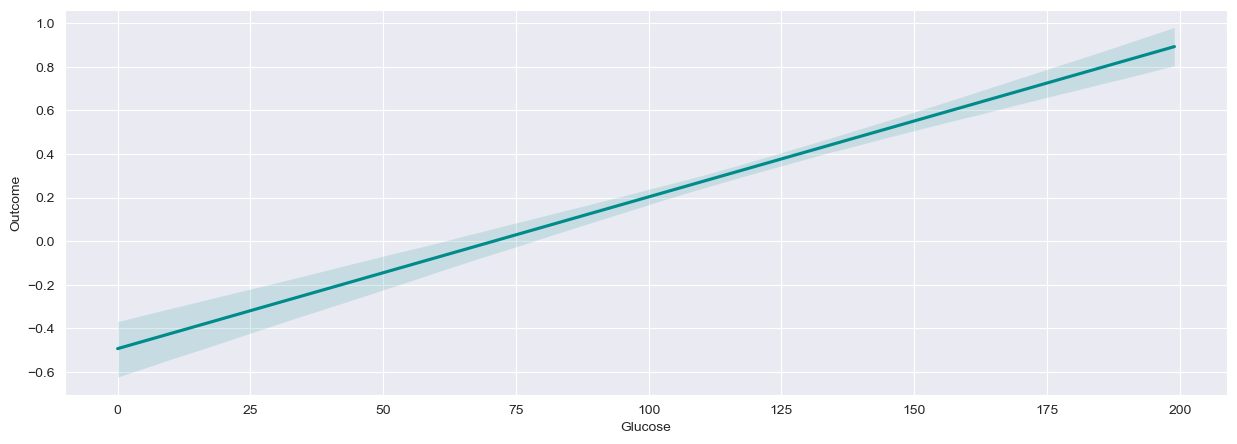

In [46]:
plt.figure(figsize=(15, 5))

sns.regplot(data=diabetes_data, x=diabetes_data.Glucose, y=diabetes_data.Outcome, scatter=False, color="darkcyan")

plt.xlabel("Glucose")

plt.show()

Do pregnancies cause diabetes?

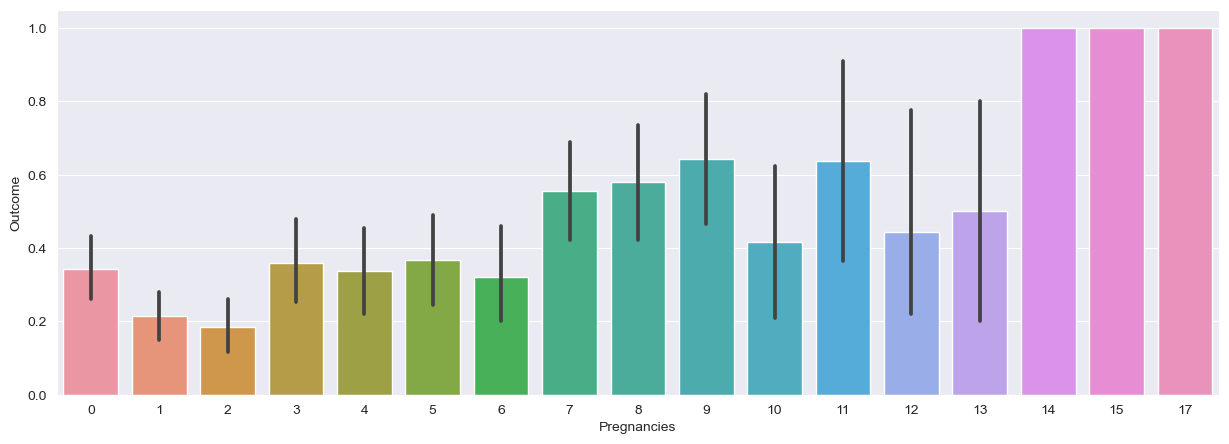

In [52]:
plt.figure(figsize=(15, 5))

sns.barplot(data=diabetes_data, x=diabetes_data.Pregnancies, y=diabetes_data.Outcome)

plt.show()

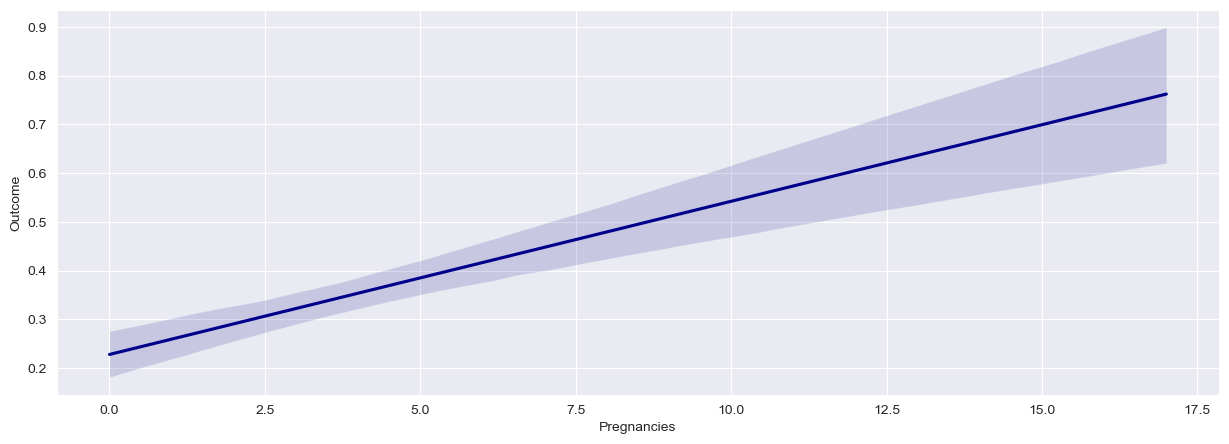

In [54]:
plt.figure(figsize=(15, 5))

sns.regplot(data=diabetes_data, x=diabetes_data.Pregnancies, y=diabetes_data.Outcome, scatter=False, color="darkblue")

plt.show()